In [9]:
from lighter.utils.runner import parse_config
from lighter.utils.dynamic_imports import import_module_from_path

import os
from monai.visualize import blend_images
import matplotlib.pyplot as plt
import numpy as np
import torch

# Change directory to the experiment folder
os.chdir("/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining")

In [2]:
os.getcwd()

'/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining'

In [3]:
kwargs = {
    "config": ["./experiments/base.yaml", "./experiments/frameworks/intrasample_simclr.yaml", "./experiments/backbones/segresenc.yaml"],
    "vars#name": 'baseline',
    "vars#project": 'test',
    "vars#wandb_group": ""
}
# Parse and validate the config.
parser = parse_config(**kwargs)

# Import the project folder as a module, if specified.
project = parser.get_parsed_content("project")
if project is not None:
    import_module_from_path("project", project)


2024/11/19 08:28:23.181  |  ℹ️  INFO      |                                                    ]8;id=631678;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py\dynamic_imports.py]8;;\:]8;id=211497;file:///home/suraj/Repositories/lighter/lighter/utils/dynamic_imports.py#79\79]8;;\
/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining imported as 'project'                         
module.                                                                                                            

In [4]:

def dataset_item_generator(item):
    if isinstance(item, list) or isinstance(item, tuple):
        for sub_item in item:
            if sub_item is None:
                continue
            elif isinstance(sub_item, list) or isinstance(sub_item, tuple):
                yield from dataset_item_generator(sub_item)
            else:
                yield sub_item
    elif isinstance(item, dict):
        for key, value in item.items():
            if value is None:
                continue
            elif isinstance(value, list) or isinstance(value, tuple):
                yield from dataset_item_generator(value)
            else:
                yield value
    else:
        yield item

        


In [5]:
train_dataset = parser.get_parsed_content("system#datasets#train")


In [ ]:
val_dataset = parser.get_parsed_content("system#datasets#val")
predict_dataset = parser.get_parsed_content("system#datasets#predict")

In [6]:
len(train_dataset)

39436

In [7]:

def plot_3d_image(ret):
    # Plot axial slice
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.imshow(ret[:, ret.shape[1] // 2, :, :].permute(1, 2, 0), cmap="gray")
    plt.title("Axial")
    plt.axis("off")

    # Plot sagittal slice
    plt.subplot(3, 1, 2)
    plt.imshow(ret[:, :, ret.shape[2] // 2, :].permute(1, 2, 0), cmap="gray")
    plt.title("Coronal")
    plt.axis("off")

    # Plot coronal slice
    plt.subplot(3, 1, 3)
    plt.imshow(ret[:, :, :, ret.shape[3] // 2].permute(1, 2, 0), cmap="gray")
    plt.title("Sagittal")

    plt.axis("off")
    plt.show()

2024/11/19 08:38:38.031  |  ⚠️  WARNING   |  To copy construct from a tensor, it is recommended to   ]8;id=632244;file:///tmp/ipykernel_3812768/771546602.py\771546602.py]8;;\:]8;id=447493;file:///tmp/ipykernel_3812768/771546602.py#22\22]8;;\
use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather                    
than torch.tensor(sourceTensor).                                                                                   

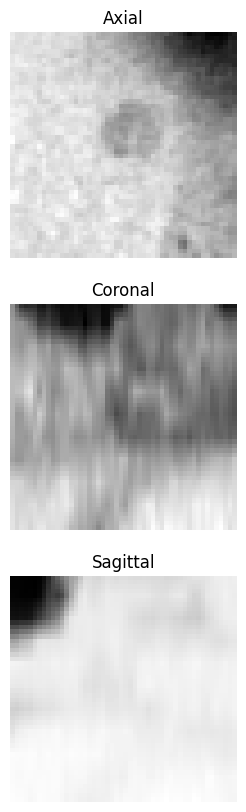

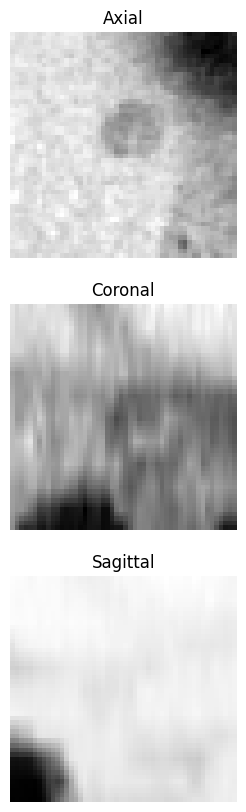

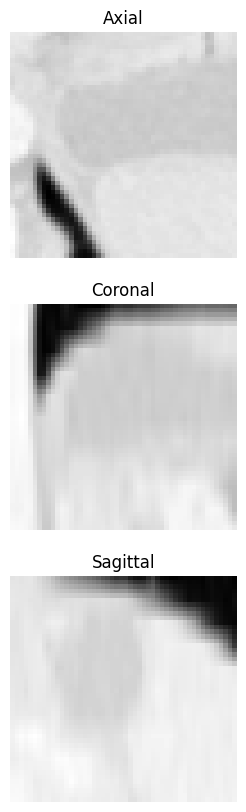

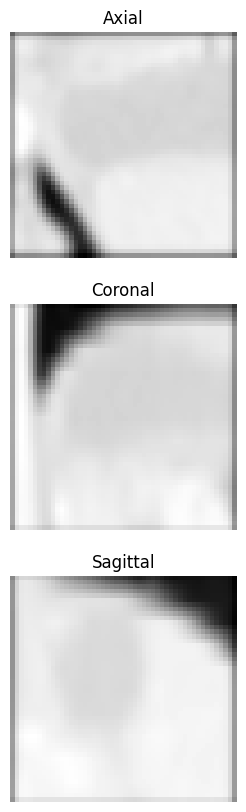

In [21]:
dataset_idx = 9
dataset_item = train_dataset[dataset_idx]

# Recursively get the first valid item
g = dataset_item_generator(dataset_item)            

for item in g:
    if isinstance(item, dict):
        for k, v in item.items():
            if isinstance(v, torch.Tensor):
                print(k, v.shape)
                if len(v.shape) == 4:
                    plot_3d_image(v)
                else:
                    plt.imshow(v[0])
                    plt.show()
            else:
                print(v)
    elif isinstance(item, torch.Tensor) or isinstance(item, np.ndarray):
        if len(item.shape) == 4:
            # item = item.transpose(0, 3, 2, 1)
            item = torch.tensor(item)
            plot_3d_image(item)
        else:
            plt.imshow(item[0])
            plt.show()
        

In [11]:
set(np.unique(label).tolist()).intersection(set([6, 5, 4, 3, 2, 1, 22, 32, 31, 30, 29, 28, 27, 26, 25, 21, 20, 19, 18, 7]))

set()

In [12]:
dataset[idx]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 dataset[idx]                                                                                                │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'dataset' is not defined

In [9]:
item["id"]

╭─────────────────────────────────────── Traceback (most recent call last) ───────────────────────────────────────╮
│ in <module>:1                                                                                                   │
│                                                                                                                 │
│ ❱ 1 item["id"]                                                                                                  │
│   2                                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'item' is not defined

In [34]:
from tqdm import tqdm
dataset = parser.get_parsed_content("system#datasets#train")
exclude_list = []
for i in tqdm(range(0, len(dataset))):
    try:
        out = dataset[i]
    except:
        exclude_list.append(i)

 69%|██████▉   | 240/347 [00:55<00:22,  4.69it/s]

2024/08/08 17:09:44.034  |  ⚠️  WARNING   |  invalid value encountered in divide                        ]8;id=568797;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utils.py\utils.py]8;;\:]8;id=503038;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utils.py#673\673]8;;\

100%|██████████| 347/347 [03:10<00:00,  1.82it/s]


In [35]:
exclude_list

[240, 244, 254, 256]

In [46]:
for exclude_idx in exclude_list:
    print(dataset.data[exclude_idx])

{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1275/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1275/label.nii.gz'), 'id': 's1275'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1341/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1341/label.nii.gz'), 'id': 's1341'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1268/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1268/label.nii.gz'), 'id': 's1268'}
{'image': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1261/ct.nii.gz'), 'label': PosixPath('/mnt/data1/TotalSegmentator/v2/processed/s1261/label.nii.gz'), 'id': 's1261'}


In [49]:
import pandas as pd
x = pd.read_csv("/mnt/data1/TotalSegmentator/v2/processed/meta.csv")

In [50]:
x[~x['image_id'].isin(['s1275', 's1341', 's1268', 's1261'])]

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location,vista_split
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear,train
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location,train
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen,train
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen,val
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location,test
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN,train
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN,train
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN,train
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN,train


In [43]:
df

,image_id,age,gender,institute,study_type,split,manufacturer,scanner_model,kvp,pathology,pathology_location,vista_split
0,s1366,50.0,NaN,I,ct polytrauma,train,siemens,sensation 64,120.0,unclear,unclear,train
1,s0245,77.0,m,I,ct abdomen-pelvis,train,siemens,somatom definition flash,100.0,no_pathology,no_location,train
2,s0325,65.0,f,I,ct abdomen-pelvis,train,siemens,sensation 64,120.0,other,abdomen,train
3,s0320,80.0,m,I,ct angiography abdomen-pelvis-leg,train,siemens,sensation 64,120.0,vascular,abdomen,val
4,s0193,63.0,m,C,ct abdomen-pelvis,train,siemens,emotion 16,130.0,no_pathology,no_location,test
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,s1425,NaN,NaN,NaN,NaN,test,NaN,NaN,NaN,NaN,NaN,train
1224,s1426,68.0,m,NaN,NaN,test,ge,lightspeed pro 16,120.0,NaN,NaN,train
1225,s1427,23.0,m,NaN,NaN,test,ge,lightspeed16,120.0,NaN,NaN,train
1226,s1428,66.0,m,NaN,NaN,test,ge,discovery mi,120.0,NaN,NaN,train
